In [69]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, ConcatDataset
from MotionDataset import MotionData
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("cuda")
else:
    device = torch.device('cpu')
    print("CPU")

cuda


In [41]:
train_labels = "./data/labels/train.csv"
val_labels = "./data/labels/val.csv"
val_dir = train_dir = "./data/"

train_data = MotionData(train_labels, train_dir)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

val_data = MotionData(val_labels, val_dir)
val_loader = DataLoader(val_data, batch_size=32)

In [74]:
# model parameters
input_size = 6
# classifying up:0, down:1, left:2, right:3
num_classes = 4
num_epochs = 40
model = nn.Sequential(
        nn.Conv1d(6, 64, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=2),
        nn.Conv1d(64, 128, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool1d(2),
        nn.BatchNorm1d(128),
        nn.Dropout(p=0.75),
        nn.Flatten(start_dim=1),
        nn.Linear(16000, 512),
        nn.ReLU(),
        nn.Linear(512, num_classes)
).to(device)

criterion = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=6e-3, momentum=0.9, weight_decay=0.0003)
# optim = torch.optim.Adagrad(model.parameters(), lr=1e-3, weight_decay=0.0001)

Epoch 1 - train: 100%|██████████| 7/7 [00:00<00:00,  8.80it/s]


Epoch 1, train loss: 1.029, val loss: 1.243, TRAIN ACC: 60.101%, VAL ACC: 62.000%


Epoch 2 - train: 100%|██████████| 7/7 [00:00<00:00,  8.58it/s]


Epoch 2, train loss: 0.3206, val loss: 1.009, TRAIN ACC: 89.899%, VAL ACC: 72.000%


Epoch 3 - train: 100%|██████████| 7/7 [00:00<00:00,  9.00it/s]


Epoch 3, train loss: 0.184, val loss: 0.7529, TRAIN ACC: 92.929%, VAL ACC: 78.000%


Epoch 4 - train: 100%|██████████| 7/7 [00:00<00:00,  9.54it/s]


Epoch 4, train loss: 0.1251, val loss: 0.5895, TRAIN ACC: 95.960%, VAL ACC: 80.000%


Epoch 5 - train: 100%|██████████| 7/7 [00:00<00:00, 10.80it/s]


Epoch 5, train loss: 0.05668, val loss: 0.3684, TRAIN ACC: 98.485%, VAL ACC: 92.000%


Epoch 6 - train: 100%|██████████| 7/7 [00:00<00:00, 11.99it/s]


Epoch 6, train loss: 0.02293, val loss: 0.5049, TRAIN ACC: 99.495%, VAL ACC: 90.000%


Epoch 7 - train: 100%|██████████| 7/7 [00:00<00:00, 12.28it/s]


Epoch 7, train loss: 0.02389, val loss: 0.5908, TRAIN ACC: 99.495%, VAL ACC: 88.000%


Epoch 8 - train: 100%|██████████| 7/7 [00:00<00:00, 12.48it/s]


Epoch 8, train loss: 0.01734, val loss: 0.3359, TRAIN ACC: 100.000%, VAL ACC: 94.000%


Epoch 9 - train: 100%|██████████| 7/7 [00:00<00:00, 12.24it/s]


Epoch 9, train loss: 0.008762, val loss: 0.1913, TRAIN ACC: 100.000%, VAL ACC: 96.000%


Epoch 10 - train: 100%|██████████| 7/7 [00:00<00:00, 11.93it/s]


Epoch 10, train loss: 0.004796, val loss: 0.1527, TRAIN ACC: 100.000%, VAL ACC: 96.000%


Epoch 11 - train: 100%|██████████| 7/7 [00:00<00:00, 10.08it/s]


Epoch 11, train loss: 0.00205, val loss: 0.1046, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 12 - train: 100%|██████████| 7/7 [00:00<00:00, 12.46it/s]


Epoch 12, train loss: 0.008068, val loss: 0.1032, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 13 - train: 100%|██████████| 7/7 [00:00<00:00, 12.17it/s]


Epoch 13, train loss: 0.004802, val loss: 0.1613, TRAIN ACC: 100.000%, VAL ACC: 96.000%


Epoch 14 - train: 100%|██████████| 7/7 [00:00<00:00, 11.94it/s]


Epoch 14, train loss: 0.002708, val loss: 0.1295, TRAIN ACC: 100.000%, VAL ACC: 96.000%


Epoch 15 - train: 100%|██████████| 7/7 [00:00<00:00, 12.34it/s]


Epoch 15, train loss: 0.002485, val loss: 0.09117, TRAIN ACC: 100.000%, VAL ACC: 96.000%


Epoch 16 - train: 100%|██████████| 7/7 [00:00<00:00, 12.08it/s]


Epoch 16, train loss: 0.001699, val loss: 0.07942, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 17 - train: 100%|██████████| 7/7 [00:00<00:00, 12.17it/s]


Epoch 17, train loss: 0.001036, val loss: 0.08396, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 18 - train: 100%|██████████| 7/7 [00:00<00:00, 11.88it/s]


Epoch 18, train loss: 0.002053, val loss: 0.07897, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 19 - train: 100%|██████████| 7/7 [00:00<00:00, 10.90it/s]


Epoch 19, train loss: 0.001407, val loss: 0.08596, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 20 - train: 100%|██████████| 7/7 [00:00<00:00, 10.98it/s]


Epoch 20, train loss: 0.005565, val loss: 0.08626, TRAIN ACC: 99.495%, VAL ACC: 98.000%


Epoch 21 - train: 100%|██████████| 7/7 [00:00<00:00, 10.82it/s]


Epoch 21, train loss: 0.003437, val loss: 0.1053, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 22 - train: 100%|██████████| 7/7 [00:00<00:00,  8.00it/s]


Epoch 22, train loss: 0.001174, val loss: 0.1544, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 23 - train: 100%|██████████| 7/7 [00:00<00:00, 10.01it/s]


Epoch 23, train loss: 0.001278, val loss: 0.1893, TRAIN ACC: 100.000%, VAL ACC: 96.000%


Epoch 24 - train: 100%|██████████| 7/7 [00:00<00:00, 11.72it/s]


Epoch 24, train loss: 0.0007177, val loss: 0.1623, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 25 - train: 100%|██████████| 7/7 [00:00<00:00,  9.03it/s]


Epoch 25, train loss: 0.001413, val loss: 0.1394, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 26 - train: 100%|██████████| 7/7 [00:00<00:00, 10.58it/s]


Epoch 26, train loss: 0.0008758, val loss: 0.1335, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 27 - train: 100%|██████████| 7/7 [00:00<00:00,  8.51it/s]


Epoch 27, train loss: 0.0007928, val loss: 0.1278, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 28 - train: 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]


Epoch 28, train loss: 0.0005272, val loss: 0.137, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 29 - train: 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]


Epoch 29, train loss: 0.000523, val loss: 0.1368, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 30 - train: 100%|██████████| 7/7 [00:00<00:00, 12.43it/s]


Epoch 30, train loss: 0.0007036, val loss: 0.1288, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 31 - train: 100%|██████████| 7/7 [00:00<00:00, 10.07it/s]


Epoch 31, train loss: 0.0007981, val loss: 0.1312, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 32 - train: 100%|██████████| 7/7 [00:00<00:00, 11.58it/s]


Epoch 32, train loss: 0.0006726, val loss: 0.1157, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 33 - train: 100%|██████████| 7/7 [00:00<00:00,  8.68it/s]


Epoch 33, train loss: 0.0005265, val loss: 0.1046, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 34 - train: 100%|██████████| 7/7 [00:00<00:00, 10.73it/s]


Epoch 34, train loss: 0.000929, val loss: 0.1104, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 35 - train: 100%|██████████| 7/7 [00:00<00:00,  8.99it/s]


Epoch 35, train loss: 0.0006401, val loss: 0.1138, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 36 - train: 100%|██████████| 7/7 [00:00<00:00, 11.74it/s]


Epoch 36, train loss: 0.0007565, val loss: 0.1349, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 37 - train: 100%|██████████| 7/7 [00:00<00:00, 11.28it/s]


Epoch 37, train loss: 0.0004239, val loss: 0.1555, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 38 - train: 100%|██████████| 7/7 [00:00<00:00, 11.64it/s]


Epoch 38, train loss: 0.0003327, val loss: 0.1397, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 39 - train: 100%|██████████| 7/7 [00:00<00:00, 10.40it/s]


Epoch 39, train loss: 0.0004337, val loss: 0.1424, TRAIN ACC: 100.000%, VAL ACC: 98.000%


Epoch 40 - train: 100%|██████████| 7/7 [00:00<00:00,  9.63it/s]


Epoch 40, train loss: 0.0005124, val loss: 0.1339, TRAIN ACC: 100.000%, VAL ACC: 98.000%


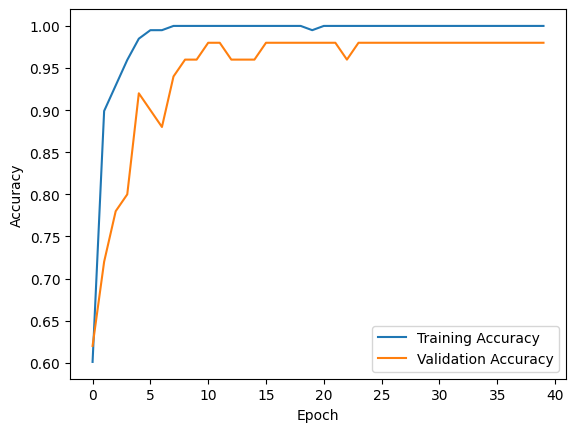

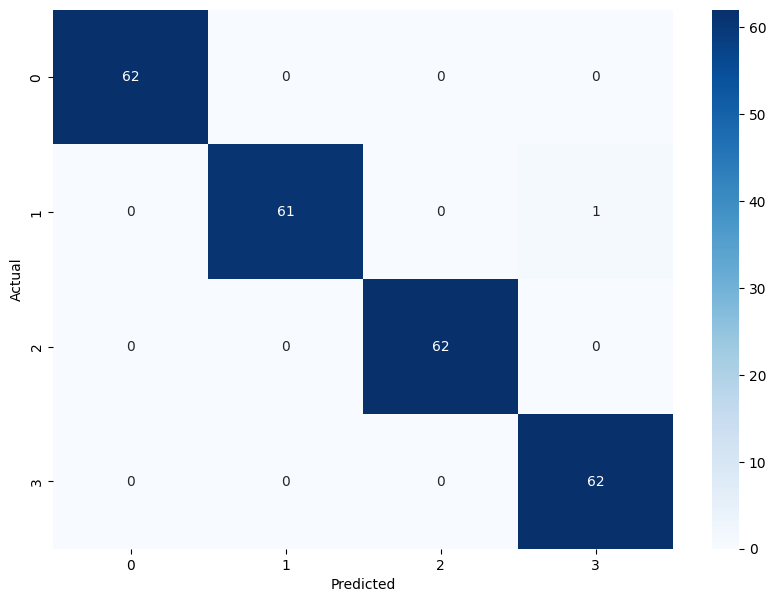

In [75]:
losses = []
train_losses = []
val_losses = []
train_accs = []
val_accs = []
for x in range(num_epochs):
    model.train()
    running_loss = 0
    train_correct = train_total = 0
    for X, y in tqdm(train_loader, desc=f"Epoch {x+1} - train"):
        X, y = X.to(device), y.to(device)
        yhat = model(X.permute(0,2,1)) # change tensor shape so sensor data are the channels
        _, pred = torch.max(nn.functional.softmax(yhat.data, dim=1), 1)
        train_total += y.size(0)
        loss = criterion(yhat, y)
        running_loss += loss.item()
        train_correct += (pred == y).sum().item()
        optim.zero_grad()
        loss.backward()
        optim.step()
    losses.append(running_loss / len(train_loader))

    model.eval()
    with torch.no_grad():
        val_correct = val_total = 0
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            yhat = model(X.permute(0,2,1))
            _, pred = torch.max(nn.functional.softmax(yhat.data, dim=1), 1)
            val_total += y.size(0)
            val_loss = criterion(yhat, y)
            val_correct += (pred == y).sum().item()
            # confusion += confusion_matrix(y.cpu().numpy(), pred.cpu().numpy(), labels=range(num_classes))
    train_acc = train_correct / train_total
    val_acc = val_correct / val_total
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss.item())
    print(f"Epoch {x+1}, train loss: {train_loss:.4}, val loss: {val_loss.item():.4}, TRAIN ACC: {train_acc:.3%}, VAL ACC: {val_acc:.3%}")

plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure(figsize=(10, 7))

confusion = np.zeros((num_classes, num_classes))
model.eval()
with torch.no_grad():
    val_correct = val_total = 0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        yhat = model(X.permute(0,2,1))
        _, pred = torch.max(nn.functional.softmax(yhat.data, dim=1), 1)
        val_loss = criterion(yhat, y)
        confusion += confusion_matrix(y.cpu().numpy(), pred.cpu().numpy(), labels=range(num_classes))

    for X, y in val_loader:
        X, y = X.to(device), y.to(device)
        yhat = model(X.permute(0,2,1))
        _, pred = torch.max(nn.functional.softmax(yhat.data, dim=1), 1)
        val_loss = criterion(yhat, y)
        confusion += confusion_matrix(y.cpu().numpy(), pred.cpu().numpy(), labels=range(num_classes))


sns.heatmap(confusion, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [76]:
best_model = model

In [56]:
param_size = 0
for param in model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 31.359MB


In [62]:
torch.save(model, "models/CNN-L.pth")

In [22]:
model = torch.load("models/CNN.pth", map_location="cpu")
# model.to(device)
model.eval()

Sequential(
  (0): Conv1d(6, 32, kernel_size=(3,), stride=(1,))
  (1): ReLU()
  (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.4, inplace=False)
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=7968, out_features=4, bias=True)
)

In [ ]:
import random as rand

labels = ["up", "down", "left", "right"]
num = rand.randint(0, 61)
true_label = rand.choice(labels)

df = pd.read_csv(f"data/{true_label}_{num:02d}.csv")
data = df[['acce_x', 'acce_y', 'acce_z', 'gyro_x', 'gyro_y', 'gyro_z']].values.astype(np.float32)
min_val = np.min(data, axis=0)
max_val = np.max(data, axis=0)
data = (data - min_val) / (max_val - min_val)
data = torch.from_numpy(data)
data.to(device)
# data.shape
with torch.no_grad():
    yhat = model(data.permute(1,0).unsqueeze(0))
    pred = torch.max(yhat, 1)
    # print(pred.indices[0].item())
    match pred.indices[0].item():
        case 0:
            print("Predict: up")
        case 1:
            print("Predict: down")
        case 2:
            print("Predict: left")
        case 3:
            print("Predict: right")
    print(f"Actual: {true_label}_{num:02d}")

In [29]:
X, y = train_data[183]
print(y)
X = torch.tensor(X)

model.eval()

with torch.no_grad():
    yhat = model(X.permute(1,0).unsqueeze(0).to("cpu"))

y, predicted = torch.max(yhat.data, 1)
predicted_class = predicted.item()
print(yhat)
print(y, predicted)
print(predicted_class)

1
tensor([[-0.8101, -0.4525, -1.5963, -2.5577]])
tensor([-0.4525]) tensor([1])
1


In [78]:
criterion = nn.CrossEntropyLoss()
with torch.no_grad():
    val_correct = val_total = 0
    for X, y in val_loader:
        X, y = X.to(device), y.to(device)
        yhat = best_model(X.permute(0,2,1))
        _, pred = torch.max(nn.functional.softmax(yhat.data, dim=1), 1)
        val_total += y.size(0)
        val_loss = criterion(yhat, y)
        val_correct += (pred == y).sum().item()
val_acc = val_correct / val_total
print(f"val loss: {val_loss.item():.4}, val acc: {val_acc:.3%}")

val loss: 0.1339, val acc: 98.000%


In [77]:
torch.save(best_model, "models/CNN-XL.pth")